## Imports

In [1]:
from jatic_toolbox import load_dataset as load_jatic_dataset
from charmory.utils import PILtoNumpy_HuggingFace
from matplotlib import pyplot as plt

/home/msw/.virtualenvs/cdao/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Pokemon Dataset From HuggingFace into Jatic Dataset

In [2]:
train_dataset = load_jatic_dataset(
    provider="huggingface",
    dataset_name="keremberke/pokemon-classification",
    task="image-classification",
    name="full",
    split="train",
)
#Using set transform to convert PIL images to numpy arrays
transform = PILtoNumpy_HuggingFace()
train_dataset.set_transform(transform)

/home/msw/.virtualenvs/cdao/lib/python3.10/site-packages/datasets/load.py:2083: FutureWarning: 'task' was deprecated in version 2.13.0 and will be removed in 3.0.0.

  warnings.warn(


## Displaying Images

In [4]:
import math
import random
from matplotlib import pyplot as plt

def show_samples(dataset, samples=3, n_col=3):
    """shows random selections from dataset with `samples` distinct labels"""

    chosen_labels = set()
    chosen = []
    while len(chosen) < samples:
        choice = random.choice(dataset)
        label = choice["label"]
        if label not in chosen_labels:
            chosen.append(choice)
            chosen_labels.add(label)


    n_row = math.ceil(samples / n_col)
    _, axs = plt.subplots(n_row, n_col)
    axs = axs.flatten()
    for sample, ax in zip(chosen, axs):
        ax.imshow(sample["image"])
    plt.show()


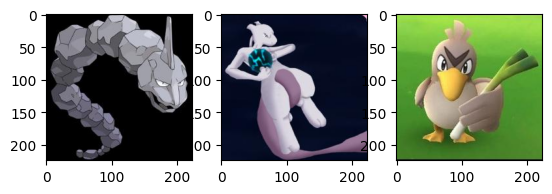

In [6]:
show_samples(train_dataset)